# Face Recognition
This notebook aims to conceive a ML model that is able to recognize and idenfity faces in near real time.

The compared models include:
* Linear Regression
* Logistic Regression
* Support Vector Machines
* Neural Networks
* Hidden Markov Models

For feature extraction we use Singular Value Decomposition

The paper for this notebook can be found at: URL

## Introduction
Face recognition has proven to be of more and more use as technology advances. Real-time identification of people, further security when unlocking personal devices or even implementing a social credit point system like in China :) Unlike face detection, which focuses on understanding where a face is on a given picture, face recognition focuses on understanding who the face in a picture belongs to; in other words, identifying people.


## Loading libraries

In [1]:
# Helper libraries
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import re
import glob
import os

from scipy.io import loadmat

# TensorFlow and Keras
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

## Processing the data
The dataset used for this project was the [ORL Face database](http://cam-orl.co.uk/facedatabase.html "Show me the data"). There
are 40 people in this dataset and each person has 10 images. These images have a size of 112 × 92. 112 is the height of the image and 92 is the width of the image. Each image contains only one face. 

Let us start by loading and sampling the data.

In [2]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

In [6]:
# Load filenames into a list
files = [ 
       os.path.join(parent, name)
       for (parent, subdirs, files) in os.walk("data")
       for name in files + subdirs if name[-3:] == "pgm"
   ]


data = []

# Load images into a labelled matrix
for f in files:
    image = read_pgm(f)
    new_img = image.reshape((image.shape[0] * image.shape[1], 1))
    label = int(f.split("/")[1][1:])

    new_img = np.append(new_img, label)

    data += [new_img]
    
np_data = np.array(data)
X_full = np_data.reshape(np_data.shape[0], np_data.shape[1])

### Classes
Additionally, let's also load the class numbers as well as a useful macro: the image dimensions (DIMS). Since we have 41 subjects, they will merely be their indexes

In [14]:
classes = range(0, 41)
DIMS = (112, 92)

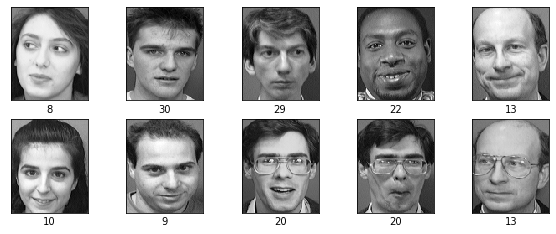

In [15]:
# Display sample_size images (with 1 < sample_size < 40)
sample_size = 10
plt.figure(figsize=(10,10))

for i in range(0, sample_size):
    idx = np.random.randint(0, 410)
    image = X_full[idx][:-1].reshape(DIMS)
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image, plt.cm.gray)
    plt.xlabel(classes[classes[X_full[idx][-1]]])
    
plt.show()